In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'D:\Data Science\ML\imdb_top_250.csv')

In [4]:
df.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


In [5]:
df.tail()

,Rank,Title,Year,Rating,Runtime
245,246,Dersu Uzala,1975,8.0,142
246,247,Monsters Inc.,2001,8.0,92
247,248,Miracle in Cell No. 7,2019,8.0,132
248,249,Children of Heaven,1997,8.0,89
249,250,All About Eve,1950,8.0,138


In [6]:
df.describe()

,Rank,Year,Rating,Runtime
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,1985.57200,8.253200,129.108000
std,72.312977,24.50729,0.255874,31.573468
min,1.000000,1921.00000,8.000000,45.000000
25%,63.250000,1966.25000,8.025000,107.000000
50%,125.500000,1993.00000,8.200000,126.000000
75%,187.750000,2004.75000,8.400000,144.500000
max,250.000000,2020.00000,9.300000,312.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     250 non-null    int64  
 1   Title    250 non-null    object 
 2   Year     250 non-null    int64  
 3   Rating   250 non-null    float64
 4   Runtime  250 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


In [8]:
df.dtypes

Rank         int64
Title       object
Year         int64
Rating     float64
Runtime      int64
dtype: object

In [10]:
df.isnull().sum()

Rank       0
Title      0
Year       0
Rating     0
Runtime    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['Rank', 'Title', 'Year', 'Rating', 'Runtime'], dtype='object')

# Visualization

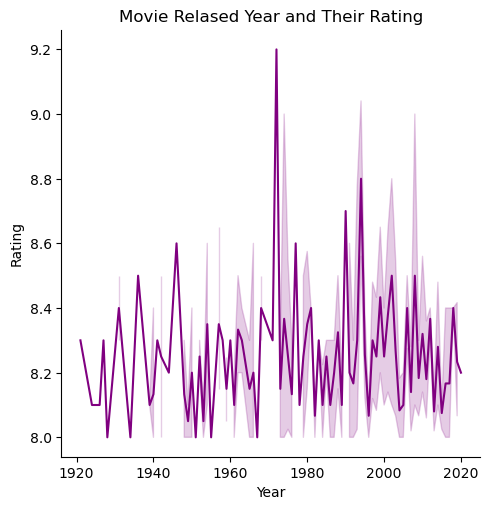

In [ ]:
sns.relplot(data=df, x='Year', y = 'Rating', kind='line', color='Purple')
plt.title('Movie Relased Year and Their Rating')
plt.show()

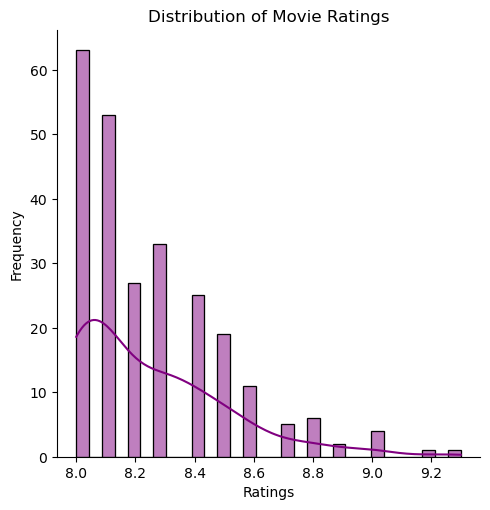

In [29]:
sns.displot(df, x= 'Rating', bins=30, kind='hist', color='Purple', kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

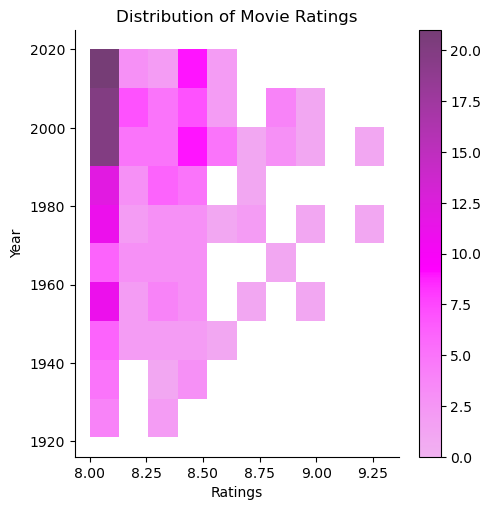

In [33]:
sns.displot(df, x='Rating', y='Year', bins=10, cbar=True, color='Purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Year')
plt.show()

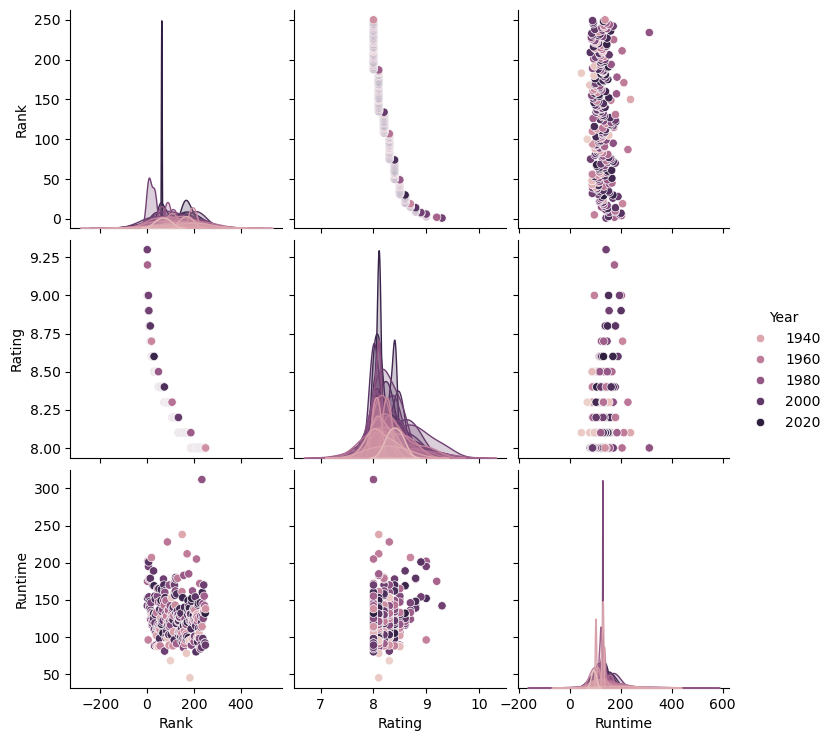

In [35]:
sns.pairplot(data=df, hue='Year')
plt.show()

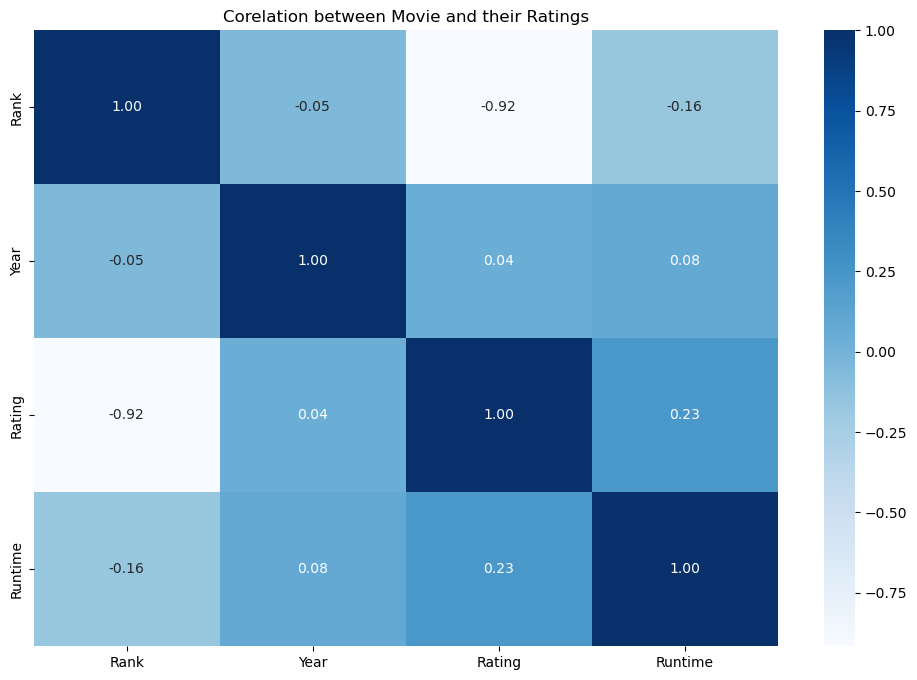

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Corelation between Movie and their Ratings')
plt.show()

# Building Models

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [48]:
df.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


In [54]:
X = df[['Year', 'Runtime']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [68]:
y_pred = model.predict(X_test)
print(y_pred)

[8.20526986 8.25210004 8.1714485  8.23258887 8.18682125 8.31934347
 8.21236577 8.20680141 8.26889666 8.17480528 8.24707437 8.16821424
 8.3223686  8.07156671 8.241979   8.24641316 8.23271138 8.21591269
 8.35895523 8.31005688 8.15618136 8.28917256 8.21290447 8.22605064
 8.30508401 8.26194224 8.17723891 8.23582313 8.16866632 8.27347025
 8.28091264 8.30687542 8.23764836 8.15538073 8.16541515 8.21599931
 8.18268283 8.16814453 8.3825879  8.2437176  8.2934504  8.24161354
 8.15962475 8.19993153 8.22726746 8.23771807 8.24973404 8.26505399
 8.32478533 8.26955787]


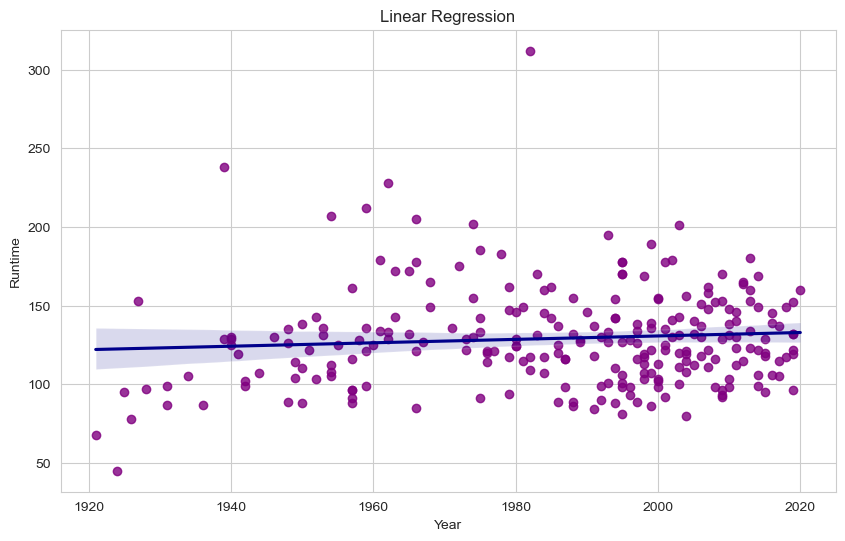

In [79]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.regplot(data=df, x='Year', y = 'Runtime', scatter_kws={'color': 'purple'}, line_kws={'color': 'darkblue'})
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

## Metrics 

In [81]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.22446986509346864

In [83]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.026666093193291794

In [84]:
df.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96
